In [1]:
# Определить зависимость температуры и влажности по отношению к количеству снега. Построить графики зависимости. В какие дни снег был больше 0.0.
# Определить аномально высокую температуру и аномально низкую температуру.
# Определить аномально высокую влажность и аномально низкую влажность.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/My Drive/shanghai_wheather_2014_2021.csv'

data = pd.read_csv(csv_path, index_col=0)

data.head()

Mounted at /content/drive


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,11.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,11.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,11.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,7.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous


In [2]:
train_data = data.drop(['sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'cloudcover', 'pressure', 'visibility', 'winddirDegree', 'windspeedKmph', 'AQI', 'AQI_Explained', 'WindGustKmph'], axis=1)

train_data.head()

,maxtempC,mintempC,totalSnow_cm,humidity,precipMM,tempC
date,,,,,,
2014-01-01,15.0,5.0,0.0,43.0,0.0,15.0
2014-01-02,14.0,7.0,0.0,60.0,0.0,14.0
2014-01-03,16.0,9.0,0.0,55.0,0.0,16.0
2014-01-04,10.0,4.0,0.0,68.0,0.1,10.0
2014-01-05,10.0,3.0,0.0,66.0,0.0,10.0


In [5]:
data_rainy_days_total = np.sum(train_data['humidity'] > 90)
data_minus_temp_days_total = np.sum(train_data['tempC'] < 0)
data_plus_temp_days_total = np.sum(train_data['tempC'] > 0)

print('Total rainy days: ', data_rainy_days_total)
print('Total minus temperature days: ', data_minus_temp_days_total)
print('Total plus temperature days: ', data_plus_temp_days_total)

data_snowy_days = np.sum(train_data['totalSnow_cm'] > 0.01)

print('Total snowy days: ', data_snowy_days)


Total rainy days:  105
Total minus temperature days:  2
Total plus temperature days:  2500
Total snowy days:  11


In [6]:
train_data = train_data.reset_index()

In [7]:
random_data = train_data.sample(n=100, random_state=42)

In [ ]:
percentile_temp_95 = np.percentile(random_data['tempC'], 95)

above_95 = random_data['tempC'] > percentile_temp_95

days_above_95 = random_data['date'][above_95]
temps_above_95 = random_data['tempC'][above_95]

print("Дни с аномально высокой температурой (выше 95% перцентиля):")
print("Дни:", days_above_95)
print("Температура:", temps_above_95)

In [ ]:
percentile_temp_5 = np.percentile(random_data['tempC'], 5)

under_5 = random_data['tempC'] < percentile_temp_5

days_under_5 = random_data['date'][under_5]
temps_under_5 = random_data['tempC'][under_5]

print("Дни с аномально низкой температурой (ниже 5% перцентиля):")
print("Дни:", days_under_5)
print("Температура:", temps_under_5)

In [ ]:
percentile_humidity_95 = np.percentile(random_data['humidity'], 95)

hum_above_95 = random_data['humidity'] > percentile_humidity_95

days_hum_above_95 = random_data['date'][hum_above_95]
humidity_above_95 = random_data['humidity'][hum_above_95]

print("Дни с аномально высокой влажностью (выше 95% перцентиля):")
print("Дни:", days_hum_above_95)
print("Влажность:", humidity_above_95)

In [9]:
percentile_humidity_5 = np.percentile(random_data['humidity'], 5)

hum_under_5 = random_data['humidity'] < percentile_humidity_5

days_hum_under_5 = random_data['date'][hum_under_5]
humidity_under_5 = random_data['humidity'][hum_under_5]

print("Дни с аномально низкой влажностью (ниже 5% перцентиля):")
print("Дни:", days_hum_under_5)
print("Влажность:", humidity_under_5)

Дни с аномально низкой влажностью (ниже 5% перцентиля):
Дни: 2472    2021-01-01
1730    2018-12-17
741     2016-03-27
2239    2020-05-12
2104    2019-12-27
Name: date, dtype: object
Влажность: 2472    34.0
1730    50.0
741     49.0
2239    36.0
2104    40.0
Name: humidity, dtype: float64


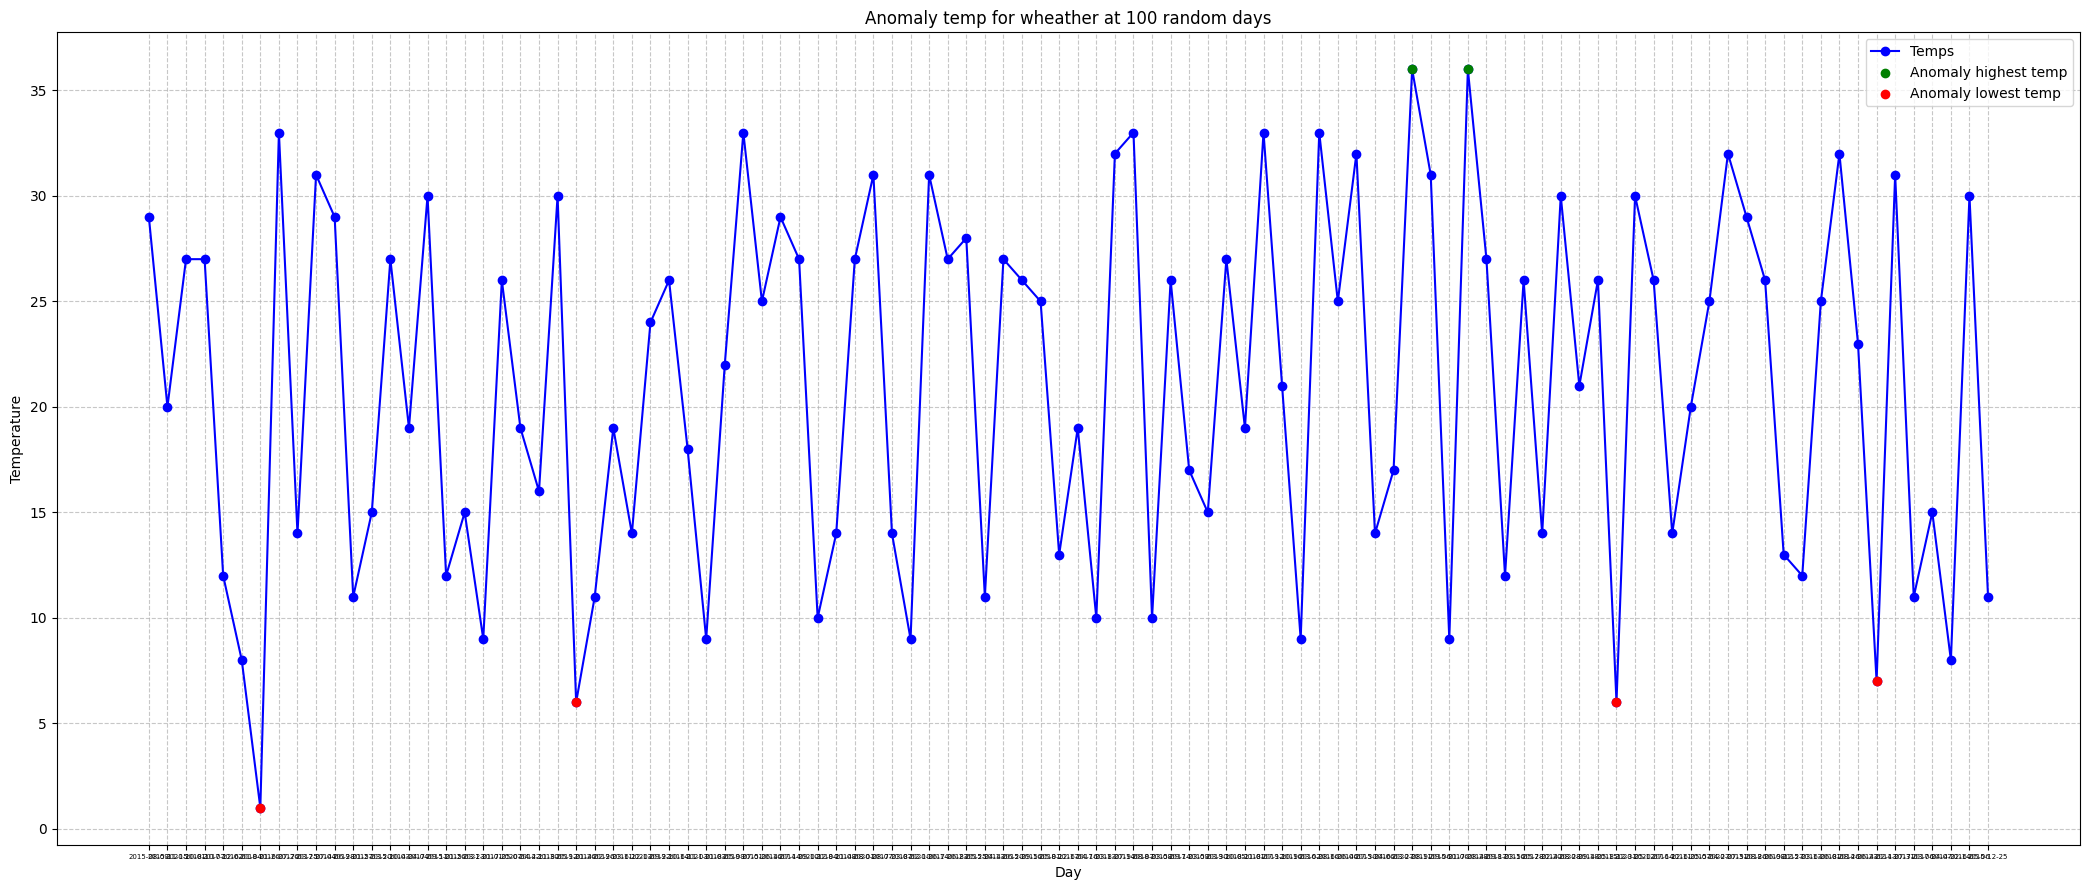

In [ ]:
plt.figure(figsize=(21, 9))
plt.plot(random_data['date'], random_data['tempC'], label='Temps', marker='o', linestyle='-', color='blue')

plt.scatter(days_above_95, temps_above_95, color='green', label='Anomaly highest temp', zorder=5)

plt.scatter(days_under_5, temps_under_5, color='red', label='Anomaly lowest temp', zorder=5)

plt.title('Anomaly temp for wheather at 100 random days')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.xticks(fontsize=5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

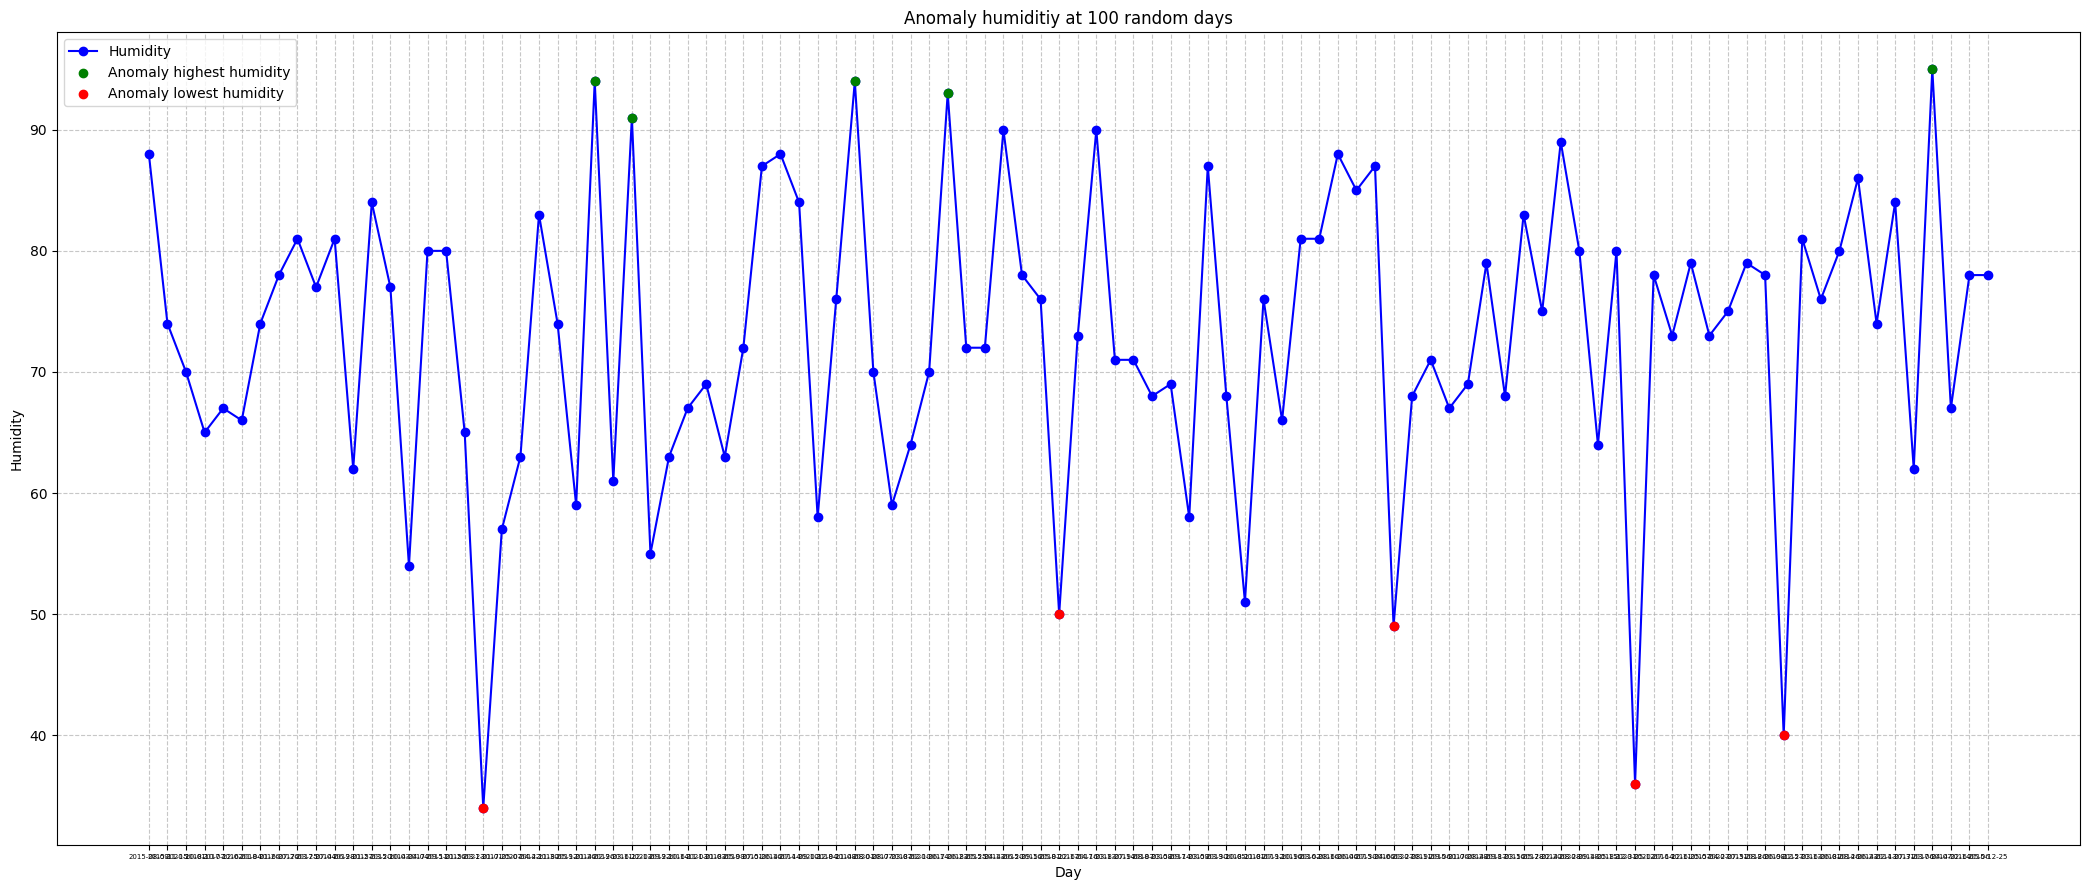

In [ ]:
plt.figure(figsize=(21, 9))
plt.plot(random_data['date'], random_data['humidity'], label='Humidity', marker='o', linestyle='-', color='blue')

plt.scatter(days_hum_above_95, humidity_above_95, color='green', label='Anomaly highest humidity', zorder=5)

plt.scatter(days_hum_under_5, humidity_under_5, color='red', label='Anomaly lowest humidity', zorder=5)

plt.title('Anomaly humidity at 100 random days')
plt.xlabel('Day')
plt.ylabel('Humidity')
plt.xticks(fontsize=5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()